### Step-by-Step Guide
 * how to use connectors at scale, such as connecting to multiple datastores, working with large volumes of documents, and handling long documents. Enterprises need a RAG system that can efficiently handle vast amounts of data from diverse sources,

In [1]:
import cohere
from cohere import ChatConnector
import uuid
from typing import List

co = cohere.Client("j3dnErL21HLrrwoaSskJsQpmAn2SxRc1JzJWg7yL")

In [3]:
# Build and Deploy the Connector
# "Enable Google Drive Access"

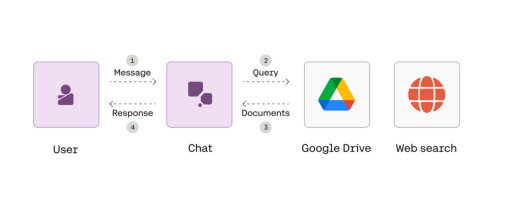

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the image
img = mpimg.imread("rag-workflow-5.png")

# Show the image
plt.imshow(img)
plt.axis("off")  # Hide axis
plt.show()


In [5]:
# Using Multiple Connectors

In [6]:
class Chatbot:
    def __init__(self, connectors: List[str]):
        """
        Initializes an instance of the Chatbot class.

        """
        self.conversation_id = str(uuid.uuid4())
        self.connectors = [ChatConnector(id=connector) for connector in connectors]

    def run(self):
        """
        Runs the chatbot application.

        """
        while True:
            # Get the user message
            message = input("User: ")

            # Typing "quit" ends the conversation
            if message.lower() == "quit":
                print("Ending chat.")
                break
            else:                       # If using Google Colab, remove this line to avoid printing the same thing twice
              print(f"User: {message}") # If using Google Colab, remove this line to avoid printing the same thing twice

            # Generate response
            response = co.chat_stream(
                    message=message,
                    model="command-a-03-2025",
                    conversation_id=self.conversation_id,
                    connectors=self.connectors,
            )

            # Print the chatbot response, citations, and documents
            print("\nChatbot:")
            citations = []
            cited_documents = []

            # Display response
            for event in response:
                if event.event_type == "text-generation":
                    print(event.text, end="")
                elif event.event_type == "citation-generation":
                    citations.extend(event.citations)
                elif event.event_type == "stream-end":
                    cited_documents = event.response.documents

            # Display citations and source documents
            if citations:
              print("\n\nCITATIONS:")
              for citation in citations:
                print(citation)

              print("\nDOCUMENTS:")
              for document in cited_documents:
                print({'id': document['id'],
                      'text': document.get('text', document.get('snippet', ''))[:50] + '...'}) # "text" for Gdrive, "snippet" for web search

            print(f"\n{'-'*100}\n")

### Run the chatbot

In [ ]:
# Define connectors
connectors = ["web-search"]


# Create an instance of the Chatbot class
chatbot = Chatbot(connectors)

# Run the chatbot
chatbot.run()

User:  What is chain of thought prompting


User: What is chain of thought prompting

Chatbot:
Chain of Thought Prompting (CoT) is a technique in artificial intelligence that enhances the reasoning capabilities of large language models (LLMs) by breaking down complex tasks into a sequence of logical steps. It involves structuring the input prompt in a way that mimics human reasoning, thereby improving the model's performance on tasks requiring logic, calculation, and decision-making.

By encouraging step-by-step thinking, CoT prompting allows models to perform complex reasoning tasks effectively without needing additional training data. This method is particularly beneficial for large models, which exhibit improved reasoning capacities when following these structured reasoning prompts.

To construct a CoT prompt, a user typically appends an instruction such as "Describe your reasoning in steps" or "Explain your answer step by step" to the end of their query. This technique not only generates a result but also details the series 

### Handling Long and Large Volume of Documents